# Computational assignment 2

# TO DO 

- få til overdamped (analytisk stemmer ikke med numerisk) FIKSET???
- skriv om hvordan vi finner C for critical damping (initialbetingelsen omega0 = 0)
- skriv om analytisk løsning 
- kommenter oppgave 1: MANGLER: evt mer utledning av analytisk løsning, mer kommentarer til plottene (se teksten). SIGRID: Gjerne kontroller at det jeg har skrevet gir mening :)))


OPPGAVE 2:
-RYDD
-Tekst til oppgave 2
-Can you relate the resonance observed to the physical parameters of our pendulum?
-Sammenligne med analytisk løsning


## 1) Damped harmonic motion of a pendulum


# må sikkert skrive om utleding av analytisk løsning??

For a pendulum without damping, the equation of motion is $\frac{d^2 \theta}{dt^2}=-\frac{g}{l}\theta$. A damped pendulum is affected by a damping force proportiaonal to the velocity, which gives the last term in the equation of motion for a damped pendulum: $\frac{d^2 \theta}{dt^2}=-\frac{g}{l}\theta-q\frac{d\theta}{dt}$.

For an underdamped pendulum, the solution for the differential equation is $\theta(t)=\theta_0e^{-qt/2}sin(\sqrt{\Omega^2-q^2/4}t+\phi)$.

An overdamped pendulum gives the solution $\theta(t)=\theta_0e^{-(q/2\pm \sqrt{q^2/4-\Omega^2})t}$.

The boundary between an underdamped and an overdamped pendulum is called a critically damped pendulum, and it has the solution $\theta(t)=(\theta_0+Ct)e^{-qt/2}$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc

In [2]:
"plotting parameters "
fontsize=15
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize, 
             'figure.titlesize':20,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (20, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}

plt.rcParams.update(newparams)

In [3]:
"""Defining functions"""
#Runge Kutta 
def Kutta4(f,t0,y0,h,nsteps,q=1,omega_D=1):
    Y=np.zeros((nsteps,2))  #2D array. Y[:,0] is theta values and Y[:,1] is omega values 
    Y[0]=y0 #initial values
    
    T=np.linspace(t0, t0 + h*nsteps, nsteps) #array of time values 
    
    for i in range(nsteps-1): 
        t=i*h
        F1= f(Y[i],t,q,omega_D)
        F2= f(Y[i] + h/2* F1,t,q,omega_D)
        F3= f(Y[i] + h/2* F2,t,q,omega_D)
        F4= f(Y[i] + h*F3,t,q,omega_D)
        
        Y[i+1]= Y[i] + h/6*(F1+2*F2+2*F3+F4) #calculating the new theta and omega values
        
    return Y,T #return array of theta and omega values, and time list


#finds the total energy per unit mass 
def total_energy(theta, omega,l): 
    E=np.zeros(len(theta)) #array of energy values 
    for i in range(len(theta)):
        E[i] = 1/2*l**2*(omega[i]**2+g/l*theta[i]**2) #calculating the energy based on theta and omega values 
    return E

MANGLER: tolke theta for overdamped pendulum, mer om energi 

The plots to the left below show the angle $\theta$ as a function of time for an underdamped, an overdamped and a critically damped pendulum. The plots include both the numerical and the analytical solutions, which matches well . The plots to the right show the work done by damping as a function of time. The energy is decreasing with time for all three pendulums, which makes sense physically. The energy plot has terrace points for the underdamped pendulum where the velocity is zero (at the maximum and minimum values of theta). 

As illustrated by the plot, the underdamped pendulum has an oscillatory motion, with an amplitude that decays with time. 

The critically damped pendulum starts out as half a sinus wave, but stops when $\theta$ reaches 0. 

6.2631142413339385


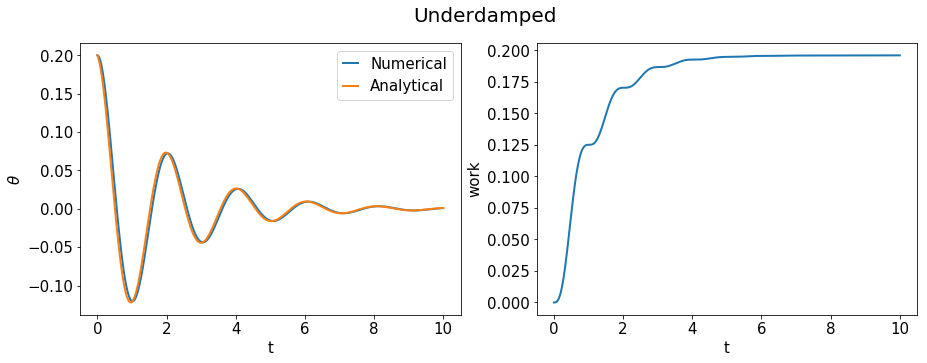

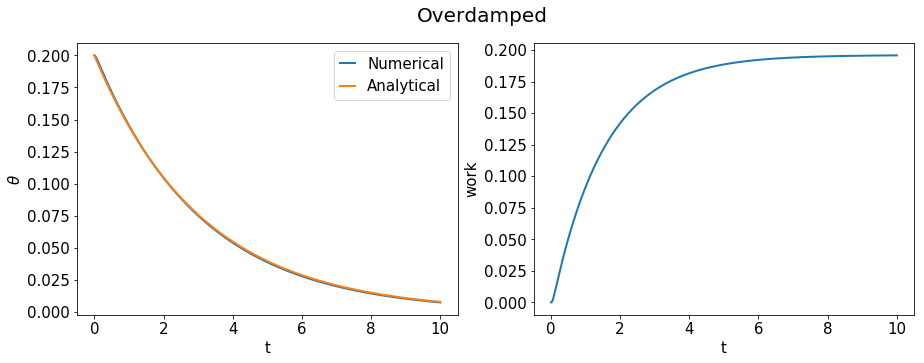

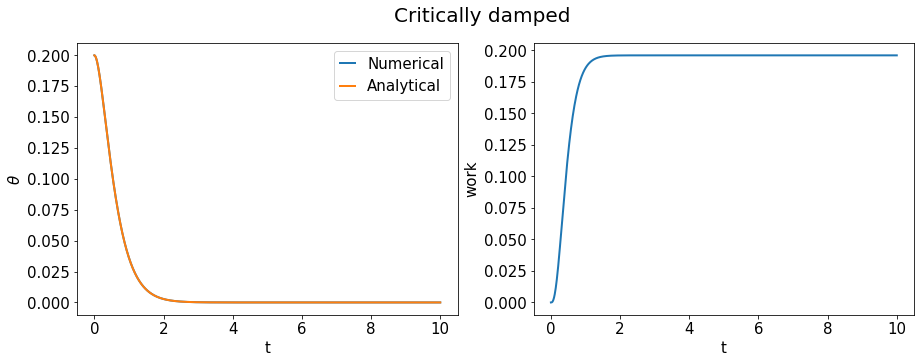

In [13]:

"""Defining constants and initial values"""
q0=1 #???????????trengs den?
delta_t=0.01 #?????????Hvilken verdi skal vi bruke????
nsteps =int(10/delta_t)   #??????Hvilken verdi skal vi bruke her da????
theta0 = 0.2
omega0 =0 
x0 = np.array([theta0,omega0])
g=sc.g
l=1
phi = np.pi/2 #Faseforskyngning (Trengs den?)


def f_damped(w,t,q,omega_D):
    return np.array([w[1],-g/l*w[0]-q*w[1]])


"""Bare en første test,SLETT?"""
#x_rk, t =  Kutta4(f2,0,x0,delta_t,nsteps,q)
#theta_damped = x_rk[:,0] 
#plt.plot(t,theta_damped)
#plt.show()
    

print(np.sqrt(4*g/l))

def plot_damped(q,analytic_sol,title): #sett sikkert inn flere parametre her
    x,t = Kutta4(f_damped,0,x0,delta_t,nsteps,q)
    theta=x[:,0]
    omega=x[:,1]
    energy=total_energy(theta, omega,l)
    E0=energy[0]
    work=-energy+E0
    theta_a=analytic_sol(t,q)
    
    f,axs=plt.subplots(2,2,figsize=(15,5))
    plt.subplot(1,2,1)
    plt.suptitle(title)
    plt.ylabel(r"$ \theta $")
    plt.xlabel("t")
    plt.plot(t,theta,label="Numerical")
    plt.plot(t,theta_a,label="Analytical")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.ylabel("Work done by damping")
    plt.ylabel("work")
    plt.xlabel("t")
    plt.plot(t,work)

    
    
def analytic_sol_u(t,q):
    return theta0 * np.exp(-q*t/2) * np.sin(np.sqrt(g/l - q**2/4)*t + phi )
    
def analytic_sol_o(t,q):  ##pluss eller minus???????????????
    exp_fact= (q/2 - np.sqrt(q**2/4 + g/l))
    return theta0 * np.exp(exp_fact*t)
    return theta0 * np.exp(-(q/2 - np.sqrt(q**2/4 + g/l))*t)
    #return theta0 * np.exp( -(q/2 + np.sqrt(q**2/4 + g/l))*t)

def analytic_sol_c(t,q): ###Hva er C ???????????????????
    C=theta0*q/2   #hva i all verden er denne????
    return (theta0 + C*t ) * np.exp(-q*t/2)
    
    

"""Plotting"""
"""Underdamped  q^2 < 4g/l  """
q_u=1
plot_damped(q_u,analytic_sol_u,"Underdamped")

"""Overdamped q^2>4g/l"""
q_o=30
plot_damped(q_o,analytic_sol_o,"Overdamped")

"""Critically damped q"""
q_c=np.sqrt(4*g/l)
plot_damped(q_c,analytic_sol_c,"Critically damped")


## 2) Forced harmonic (damped) pendulum 

SHOW NUMERICALLY THE EXISTENCE OF RESONANCE FOR THIS PROBLEM!!
(Hvordan skal vi gjøre det?)

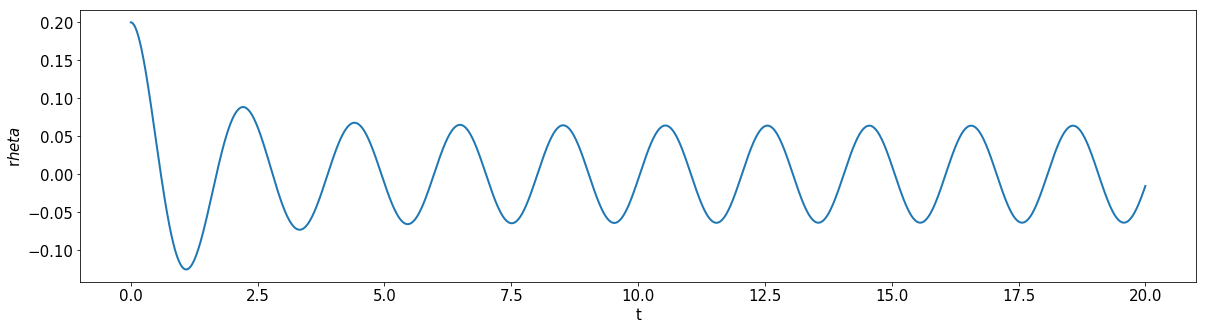

3.1315571206669692


In [11]:
#default value for driving force
nsteps_f= int(20/delta_t)
Fd = 0.2
Omega_D = np.sqrt(g/l)  #prøvde å sette den til resonansfrekvensen
q0=1

def f_forced(w,t,q,omega_D):
    return np.array([w[1],-q*w[1]-g/l*w[0]+Fd*np.sin(omega_D*t+phi)])

x_forced, t = Kutta4(f_forced,0,x0,delta_t,nsteps_f,q0,Omega_D)
theta_forced=x_forced[:,0]

plt.xlabel("t")
plt.ylabel("$\theta$") #!!!!!!!!!!!!!!!!!
plt.plot(t,theta_forced)
plt.show()

print(Omega_D)
Omega_D_list=[0,1,3,5,10]



The plot below shows how the resonance amplitude varies with respect to $\Omega_D$.

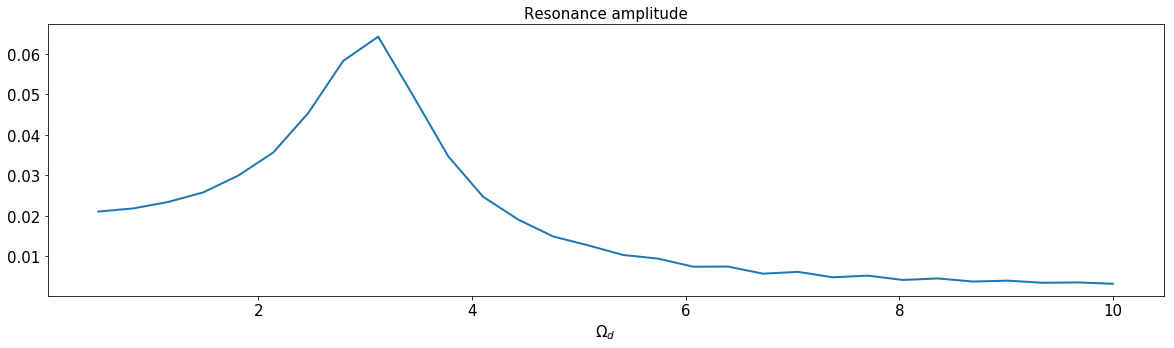

In [6]:
"""Dependence of Omega_D"""
nsteps_omega_D = 3000

#skal finne resonans amplituden
def resonance_amplitude(theta_list):
    midle_of_list= int(nsteps_f/2)
    return np.max(theta_list[midle_of_list:])
    
list_of_omega_D = np.linspace(0.5,10,30) 
amplitudes_omega_D=np.zeros(len(list_of_omega_D))

for i in range(len(list_of_omega_D)):
    omega_i = list_of_omega_D[i]
    x_i, t= Kutta4(f_forced,0,x0,delta_t,nsteps_omega_D,q0,omega_i)
    theta_i = x_i[:,0]
    amplitudes_omega_D[i] = resonance_amplitude(theta_i)
    plt.plot()

plt.title("Resonance amplitude")
plt.xlabel("$\Omega_d$")
plt.plot(list_of_omega_D,amplitudes_omega_D)


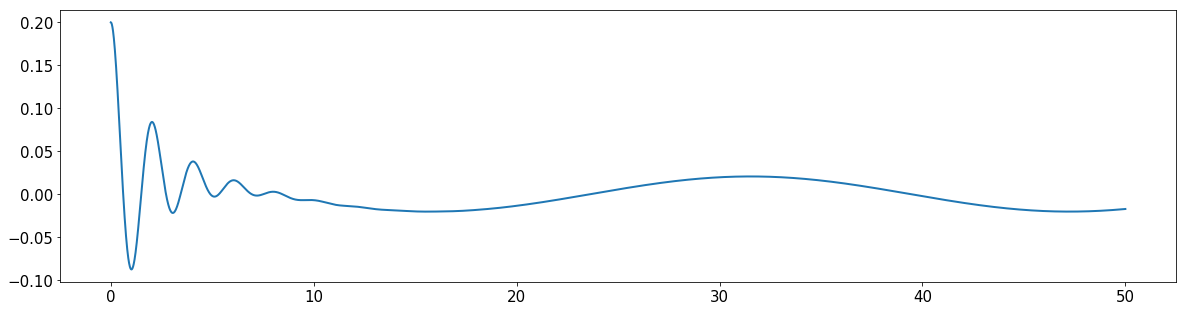

In [7]:
"""bare test"""
x_test1, t= Kutta4(f_forced,0,x0,delta_t,5000,q0,0.2)

theta_test1 = x_test1[:,0]

plt.plot(t,theta_test1)
plt.show()


In [8]:
"""test for å finne ut hvor stor tidsintervall vi må ha"""

T= 2*np.pi/0.5
print(T)

12.566370614359172


The plot below shows how the resonance amplitude varies with respect to the friction parameter q. (Which confirms the dependence of the resonance amplitude on q). 

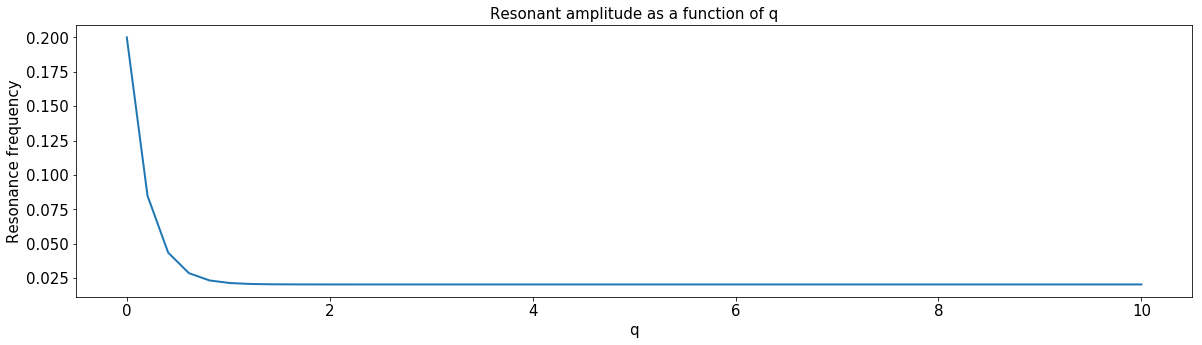

In [9]:
"Dependence of q"

qlist=np.linspace(0,10,50)
Amplitudes_qi=np.zeros(len(qlist))

for i in range(len(qlist)):
    qi = qlist[i]
    x_i, t= Kutta4(f_forced,0,x0,delta_t,nsteps_omega_D,qi,omega0)
    theta_i = x_i[:,0]
    Amplitudes_qi[i] = resonance_amplitude(x_i[:,0])

plt.title("Resonant amplitude as a function of q")
plt.xlabel("q")
plt.ylabel("Resonance frequency")
plt.plot(qlist,Amplitudes_qi)